# Schrödinger Equation

$$ i \hbar \dfrac{\partial}{\partial t} \left\lvert \psi(x,t) \right\rangle = \left( -\dfrac{\hbar}{2 m} \dfrac{\partial^2}{\partial x^2} + V(x) \right)\left\lvert \psi(x,t) \right\rangle  $$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib.animation import PillowWriter
from numba import jit
import numba
%matplotlib inline

In [2]:
m = 1
h = 1
L = 1

Discredizar $\lvert \psi \rangle$. 

$$ \psi^{m+1}_{j} = \psi^{m}_{j} + \dfrac{i \Delta t}{2 \Delta x^2} \left( \psi^{m}_{j+1} - 2\psi^{m}_{j} + \psi^{m}_{j-1} \right) - i \Delta t V(x) \psi^{m}_{j}  $$


In [3]:
Nx = 301
Nt = 100000
dx = 1 / (Nx - 1)
dt = 1e-7
x = np.linspace(0, 1, Nx)

In [4]:
# psi0 = np.sqrt(2) * np.sin(np.pi * x)

psi0 = np.zeros(len(x), dtype = complex)
psi0[len(x)//2] = 1j/np.sqrt(dx)

normal = np.sum(np.absolute(psi0)**2) * dx

normal

0.9999999999999999

In [5]:
# mu, sigma = 1 / 2, 1 / 20
# V = -1e4 * np.exp(-(x - mu)**2 / (2 * sigma**2))

V = -1e6 * (x**11 - x**2)

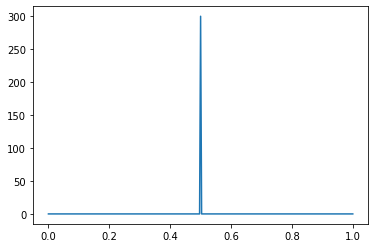

In [6]:
plt.plot(x, np.absolute(psi0)**2)
plt.show()

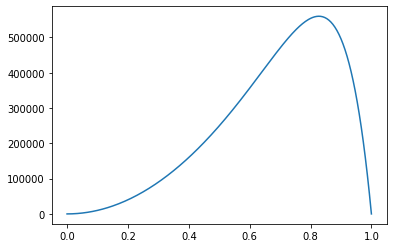

In [7]:
plt.plot(x, V)
plt.show()

In [8]:
psi = np.zeros([Nt, Nx], dtype = complex)
psi[0] = psi0

In [9]:
@numba.jit("c16[:,:](c16[:,:])", nopython=True, nogil=True)
def compute_psi(psi):
    for t in range(0, Nt - 1):
        for i in range(1, Nx - 1):
            psi[t + 1][i] = psi[t][i] + 1j / 2 * dt / dx**2 * (
                psi[t][i + 1] - 2 * psi[t][i] +
                psi[t][i - 1]) - 1j * dt * V[i] * psi[t][i]

        normal = np.sum(np.absolute(psi[t + 1])**2) * dx
        for i in range(1, Nx - 1):
            psi[t + 1][i] = psi[t + 1][i] / normal

    return psi

In [10]:
sol_psi = compute_psi(psi.astype(complex))

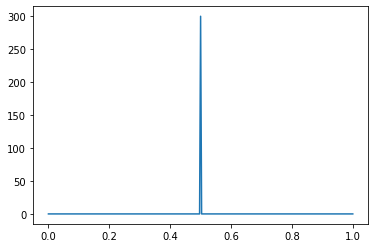

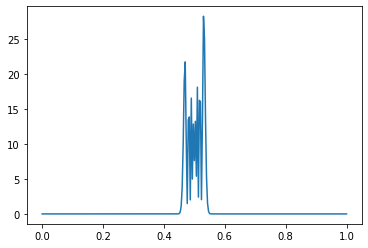

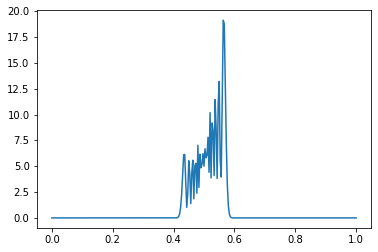

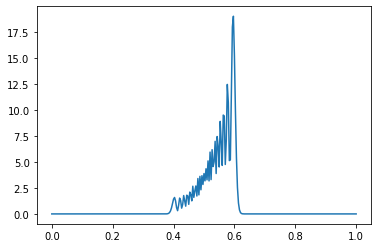

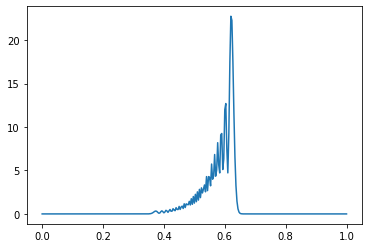

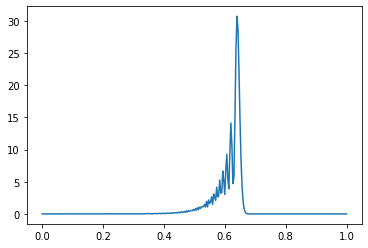

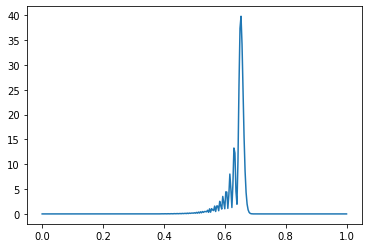

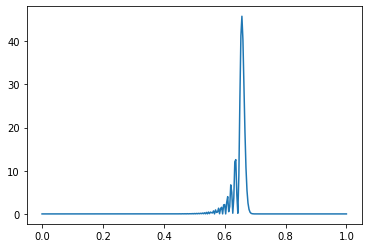

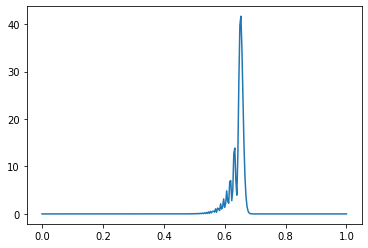

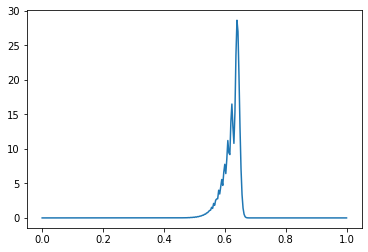

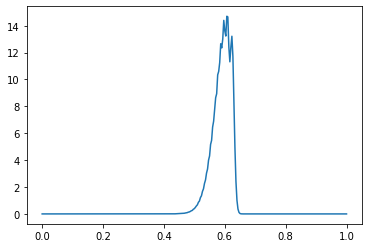

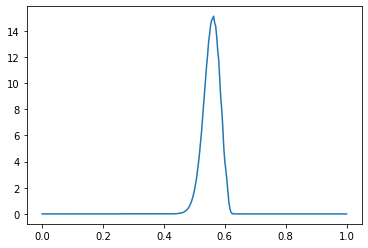

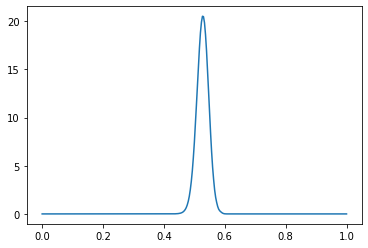

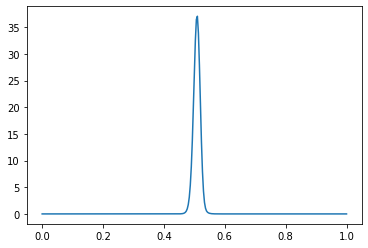

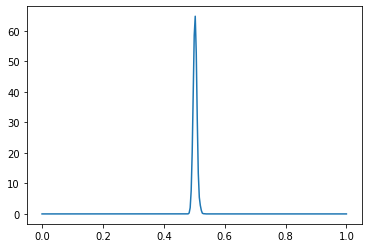

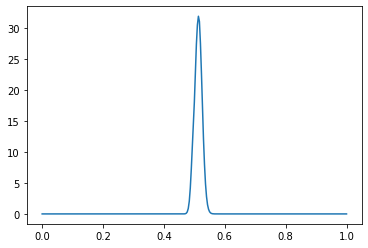

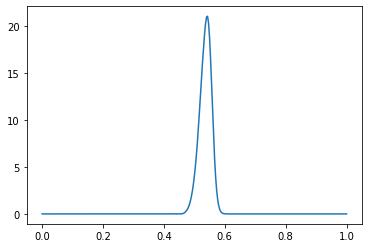

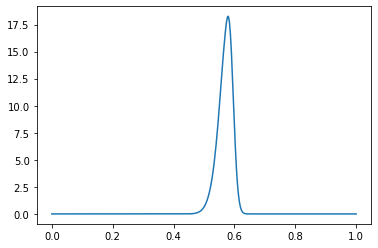

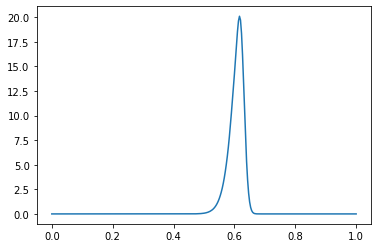

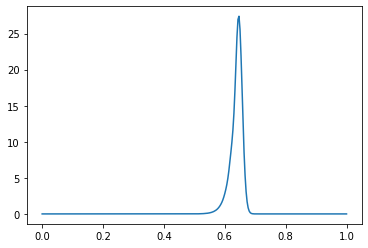

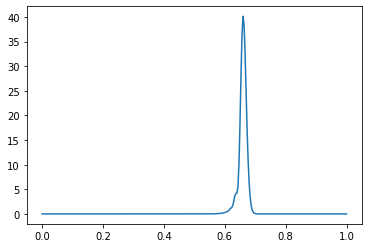

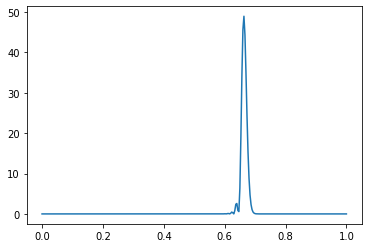

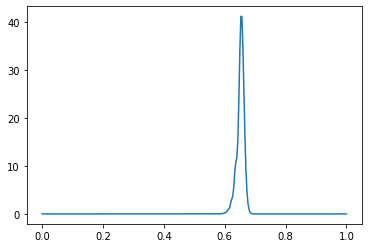

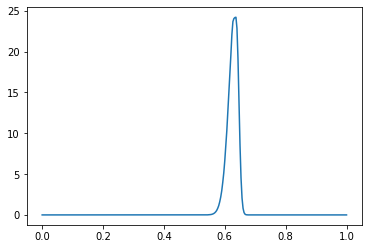

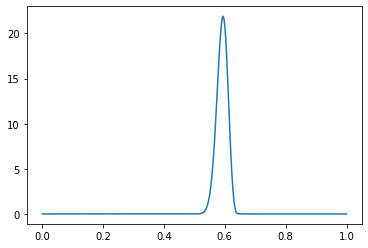

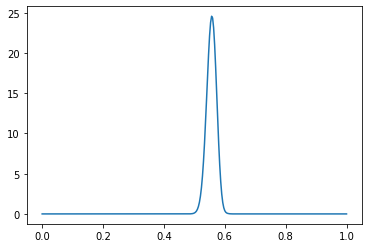

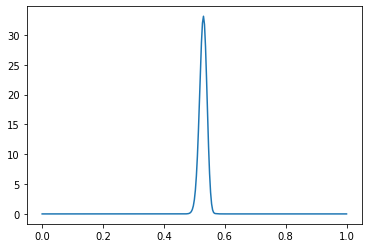

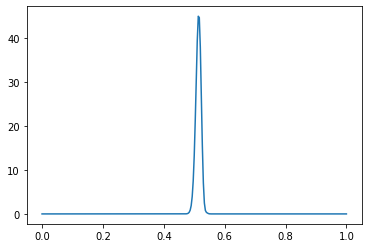

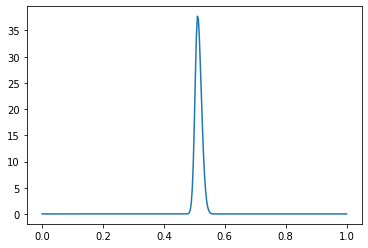

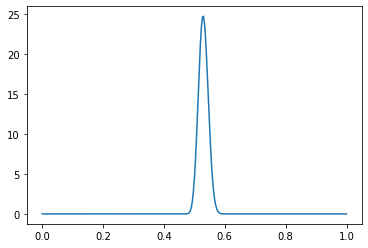

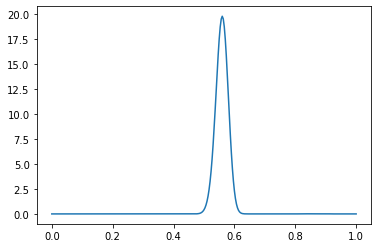

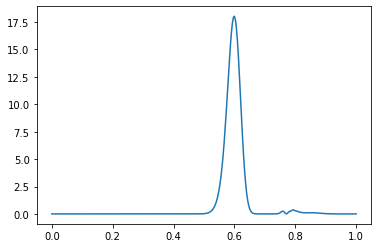

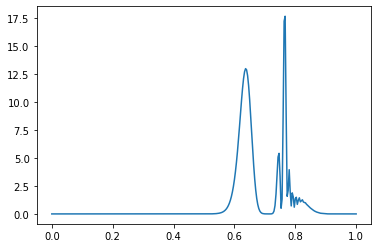

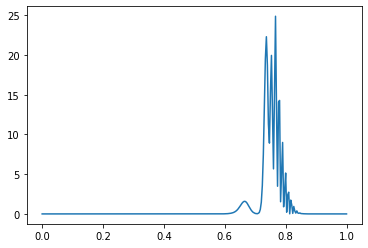

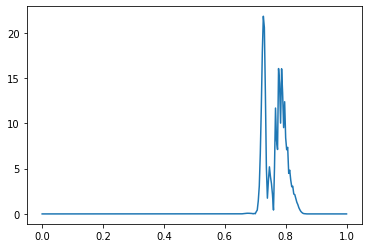

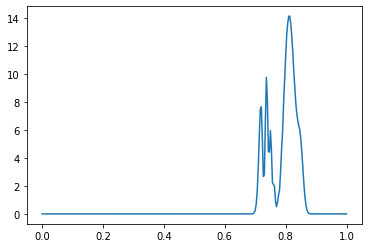

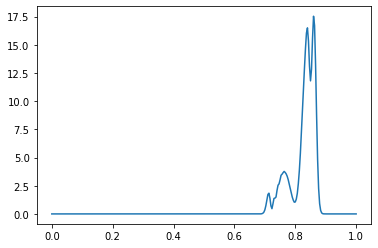

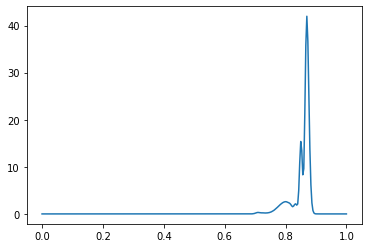

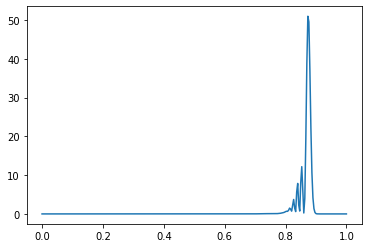

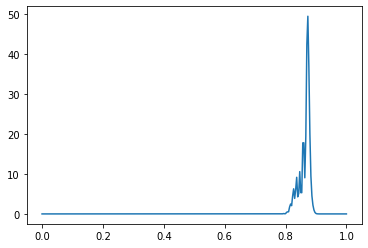

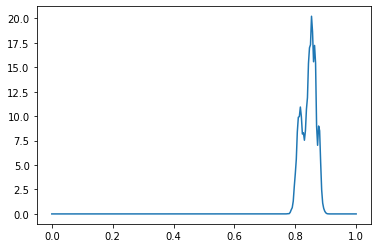

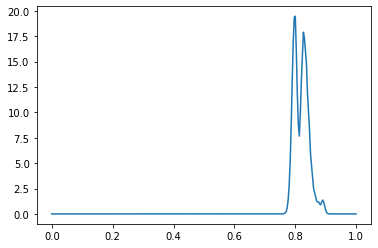

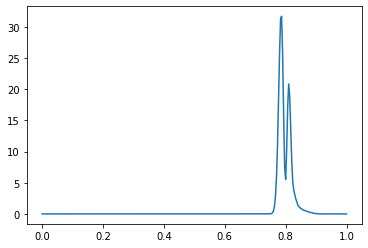

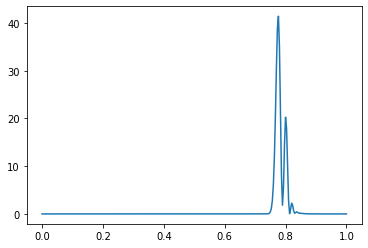

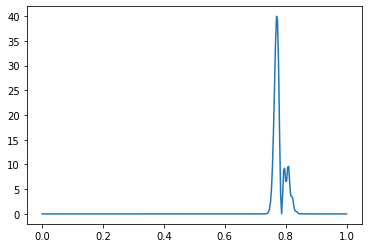

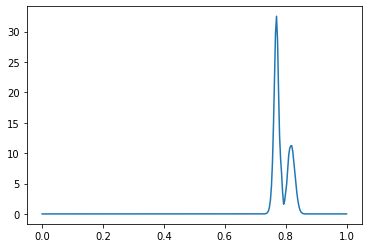

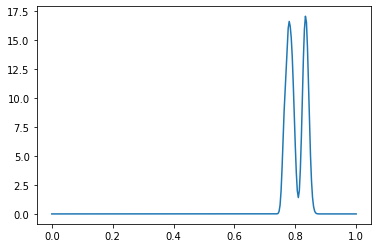

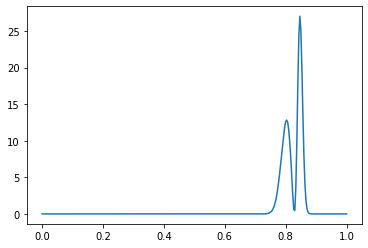

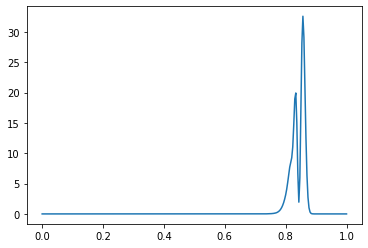

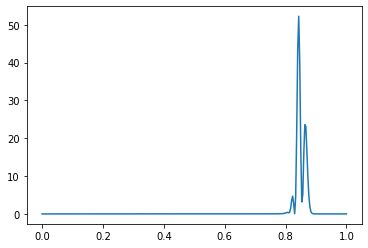

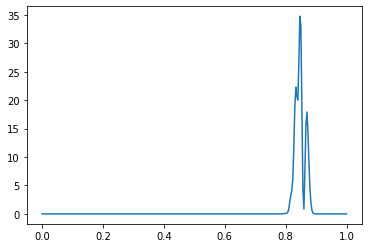

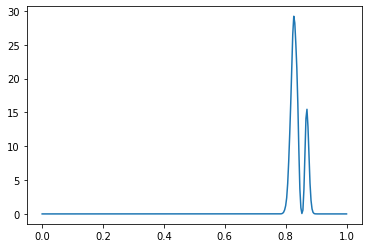

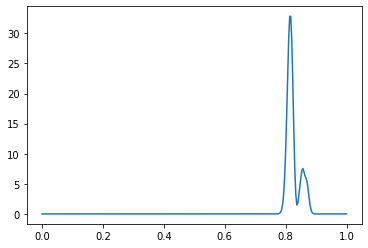

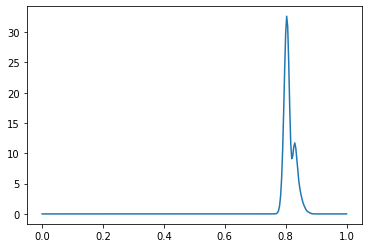

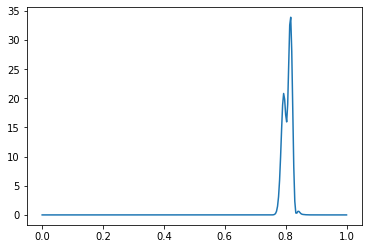

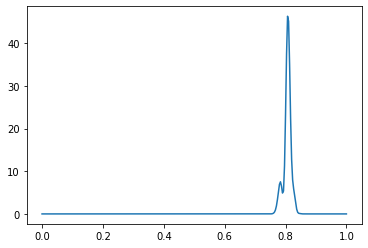

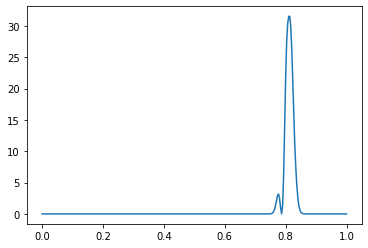

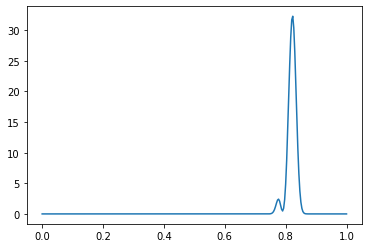

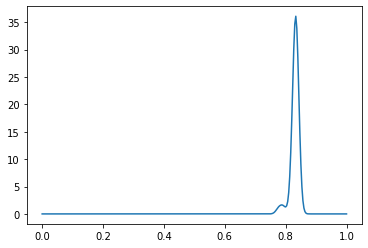

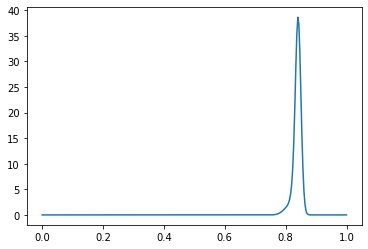

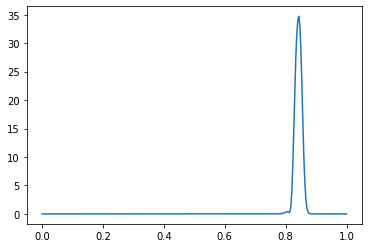

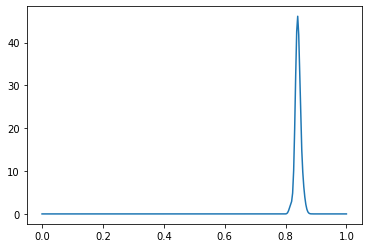

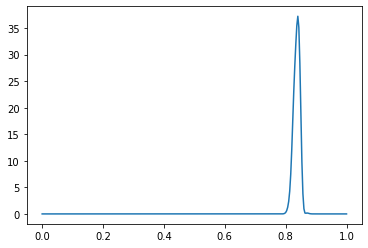

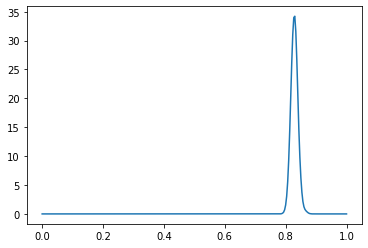

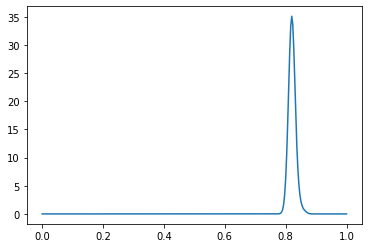

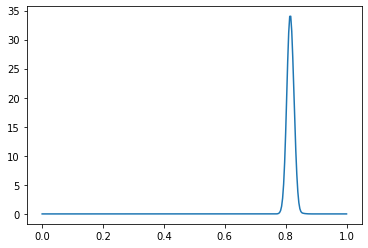

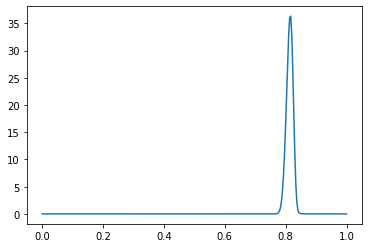

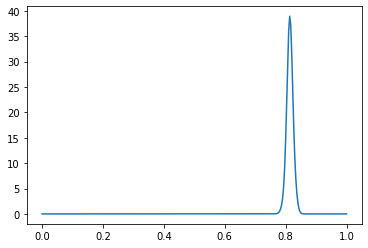

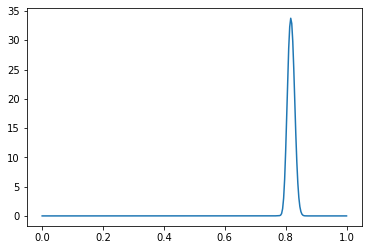

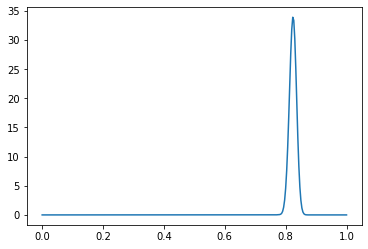

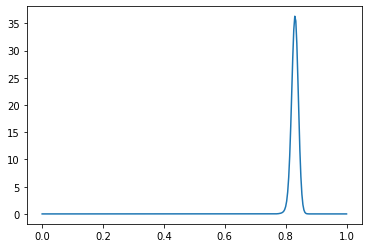

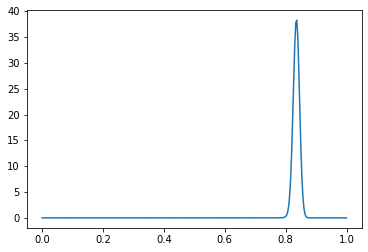

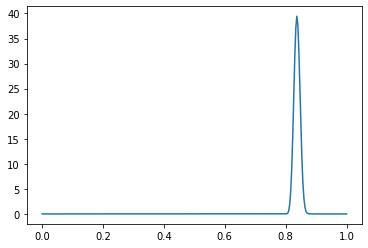

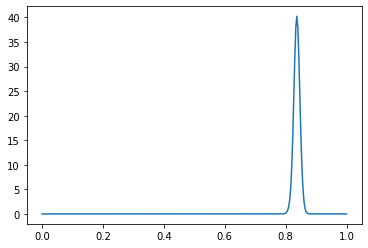

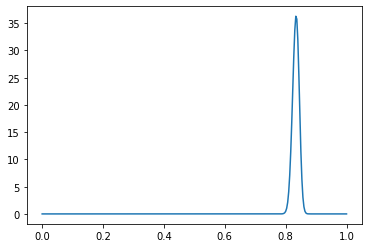

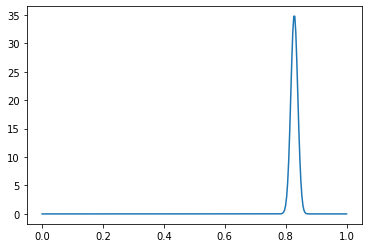

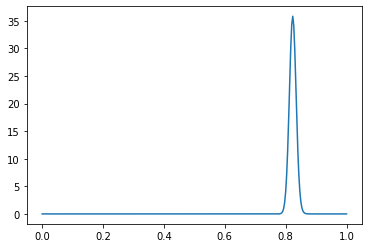

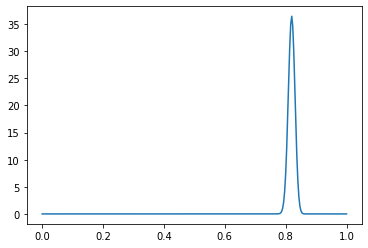

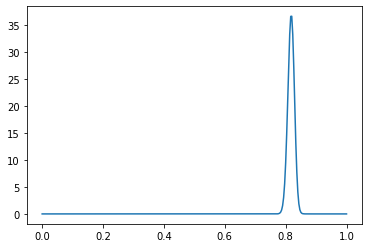

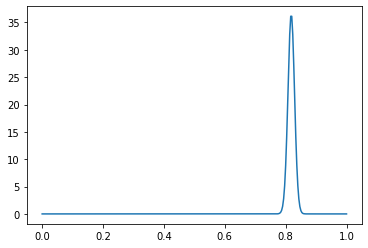

In [11]:
for i in range(80):
    plt.plot(x, np.absolute(sol_psi[int(Nt/80)*i])**2)
    plt.show()

In [12]:
dt / dx**2

0.008999999999999998